In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load Data

In [2]:
data = pd.read_excel('data.xlsx')
# data = pd.read_csv('data.csv')

In [3]:
data.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [4]:
data.describe()

,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,25.500000,19.535714,15.714286,1411.443609,1.853383,1.287594,717.750000,77.823872,0.191729,0.234962,0.113289,0.072650,2.114662,0.090226
std,4.319404,11.840459,11.921161,1043.171856,3.338009,2.095191,631.372522,13.011631,0.850881,0.975818,0.148174,0.090072,2.269094,0.293268
min,16.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,9.000000,4.000000,426.000000,0.000000,0.000000,171.500000,73.500000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000
50%,26.000000,21.000000,15.000000,1345.000000,1.000000,0.000000,573.500000,79.200000,0.000000,0.000000,0.060000,0.050000,2.000000,0.000000
75%,29.000000,30.000000,27.000000,2303.500000,2.000000,2.000000,1129.500000,84.625000,0.000000,0.000000,0.150000,0.110000,3.000000,0.000000
max,38.000000,38.000000,38.000000,3420.000000,23.000000,14.000000,3214.000000,100.000000,9.000000,10.000000,1.160000,0.900000,12.000000,2.000000


In [5]:
data['MinsPerMatches'] = (data['Mins']/data['Matches']).astype(int)
data['GoalsPerMatches'] = (data['Goals']/data['Matches']).astype(float)
data.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatches,GoalsPerMatches
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0,80,0.166667
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0,88,0.000000
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,74,0.171429
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0,84,0.111111
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0,74,0.031250


In [6]:
#Total Goals 
total_goals = data['Goals'].sum()
total_goals

986

In [7]:
#Total Penalty Goals
total_penaltyGoals = data['Penalty_Goals'].sum()
total_penaltyGoals

102

In [8]:
#Penalty_Attempted
total_PenaltyAttempted = data['Penalty_Attempted'].sum()
total_PenaltyAttempted

125

In [9]:
#Total Penalty missed
Penalty_missed = total_PenaltyAttempted - total_penaltyGoals
Penalty_missed

23

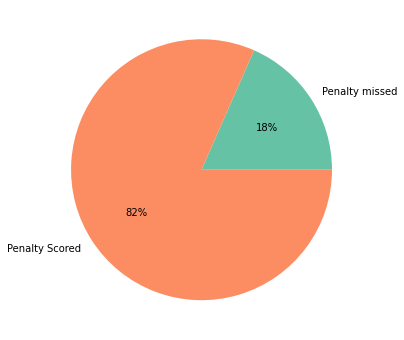

In [10]:
plt.figure(figsize=(13, 6))
plt_data = [Penalty_missed , total_penaltyGoals]
plt_lables = ['Penalty missed', 'Penalty Scored']
color = sns.color_palette('Set2') 
plt.pie(plt_data, labels=plt_lables,colors=color, autopct='%.0f%%')
plt.show()

In [11]:
#unique position
data['Position'].unique()

array(['MF,FW', 'GK', 'FW', 'DF', 'MF', 'FW,MF', 'FW,DF', 'DF,MF',
       'MF,DF', 'DF,FW'], dtype=object)

In [12]:
data['Club'].unique()

array(['Chelsea', 'Manchester City', 'Manchester United', 'Liverpool FC',
       'Leicester City', 'West Ham United', 'Tottenham Hotspur',
       'Arsenal', 'Leeds United', 'Everton', 'Aston Villa',
       'Newcastle United', 'Wolverhampton Wanderers', 'Crystal Palace',
       'Southampton', 'Brighton', 'Burnley', 'Fulham',
       'West Bromwich Albion', 'Sheffield United'], dtype=object)

In [13]:
# Total FW Player
data[data['Position'].str.contains('FW')]

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatches,GoalsPerMatches
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0,80,0.166667
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,74,0.171429
12,Christian Pulisic,Chelsea,USA,"FW,MF",21,27,18,1738,4,2,690,80.0,0,0,0.28,0.14,2,0,64,0.148148
13,Kai Havertz,Chelsea,GER,"MF,FW",21,27,18,1520,4,3,765,86.1,0,0,0.37,0.09,2,0,56,0.148148
15,Hakim Ziyech,Chelsea,MAR,"FW,MF",27,23,15,1172,2,3,734,74.7,0,0,0.15,0.28,3,0,50,0.086957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,Rhian Brewster,Sheffield United,ENG,FW,20,27,12,1128,0,0,225,69.3,0,0,0.14,0.13,1,0,41,0.000000
523,Billy Sharp,Sheffield United,ENG,FW,34,16,7,735,3,0,123,69.9,2,2,0.33,0.07,1,0,45,0.187500
526,Daniel Jebbison,Sheffield United,ENG,FW,17,4,3,284,1,0,34,70.6,0,0,0.50,0.01,0,0,71,0.250000
527,Lys Mousset,Sheffield United,FRA,"FW,MF",24,11,2,296,0,0,50,80.0,0,0,0.22,0.10,0,0,26,0.000000


In [14]:
# num of unique Nationality
data['Nationality'].nunique()

59

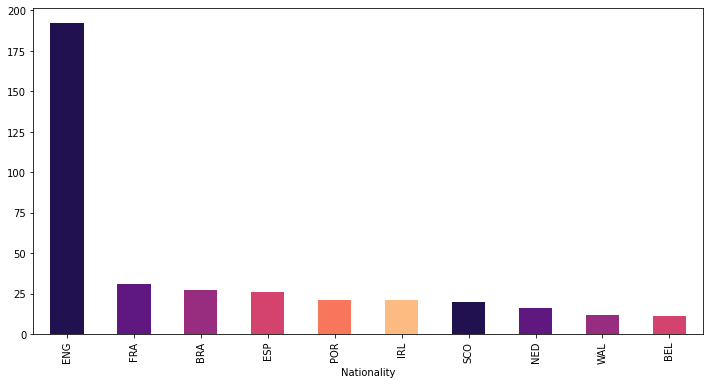

In [15]:
Nationality = data.groupby('Nationality').size().sort_values(ascending=False)
Nationality.head(10).plot(kind='bar' , figsize = (12,6), color=sns.color_palette('magma'))

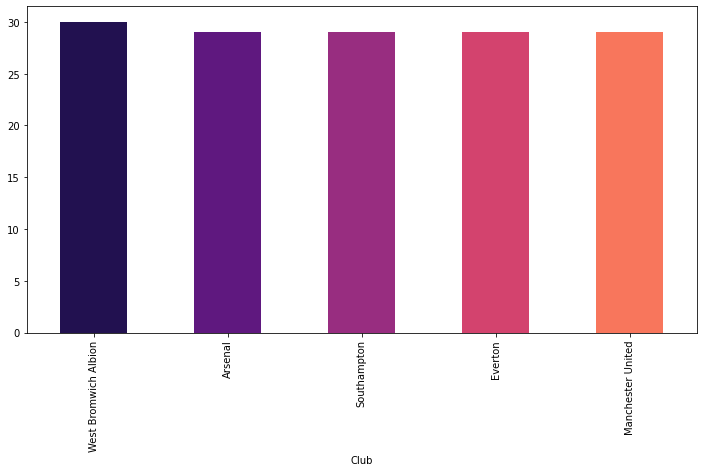

In [16]:
# club with max num of player
Club_size = data.groupby('Club').size().sort_values(ascending=False)
Club_size.head(5).plot(kind='bar' , figsize = (12,6), color=sns.color_palette('magma'))

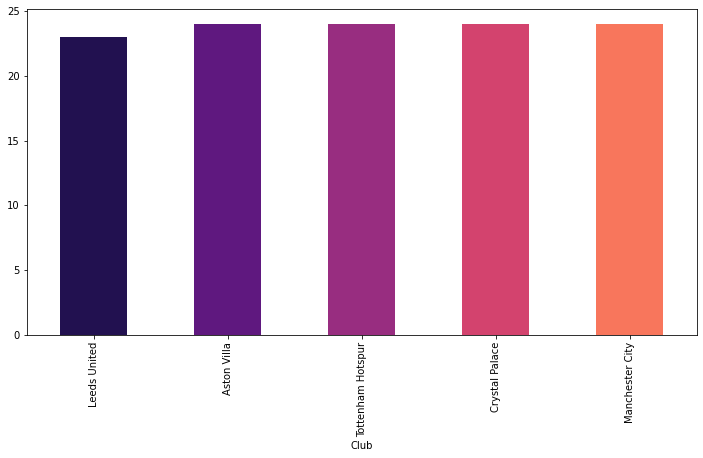

In [17]:
# club with min num of player
Club_size = data.groupby('Club').size().sort_values(ascending=True)
Club_size.head(5).plot(kind='bar' , figsize = (12,6), color=sns.color_palette('magma'))

In [18]:
#playrer bassed on age groub
under20 = data[data['Age'] <= 20].shape[0]
from20to25 = data[(data['Age'] > 20) & (data['Age'] <= 25)].shape[0]
from25to30 = data[(data['Age'] > 25) & (data['Age'] <= 30)].shape[0]
over30 = data[data['Age'] > 30].shape[0]

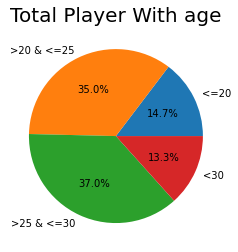

In [19]:
plt_data = [under20,
                from20to25,
                from25to30,
                over30]

plt_lables = ['<=20', '>20 & <=25', '>25 & <=30', '<30']
plt.title('Total Player With age', fontsize=20)
plt.pie(plt_data, labels=plt_lables, autopct='%.1f%%')
plt.show()

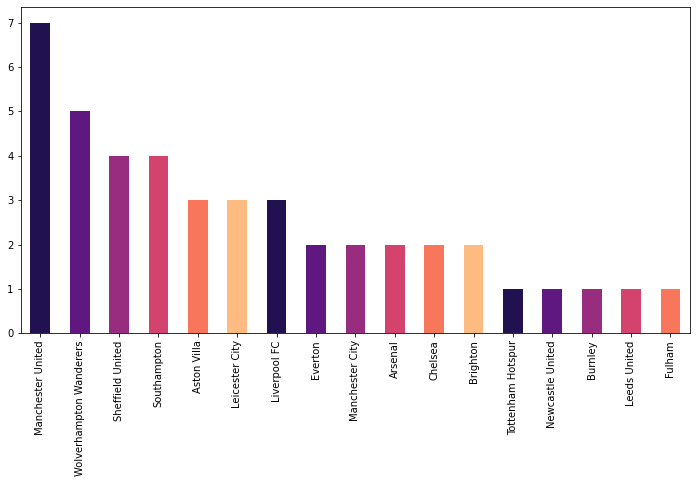

In [20]:
player_under_20 = data[data['Age']<20]
player_under_20['Club'].value_counts().plot(kind='bar' , figsize = (12,6), color=sns.color_palette('magma'))

In [21]:
# player under 20 in Manchester United
player_under_20[player_under_20['Club'] == 'Manchester United']

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatches,GoalsPerMatches
61,Mason Greenwood,Manchester United,ENG,FW,18,31,21,1822,7,2,732,83.1,0,0,0.37,0.09,2,0,58,0.225806
72,Brandon Williams,Manchester United,ENG,DF,19,4,2,188,0,0,140,85.7,0,0,0.05,0.01,0,0,47,0.000000
73,Amad Diallo,Manchester United,CIV,FW,18,3,2,166,0,1,64,84.4,0,0,0.02,0.26,0,0,55,0.000000
74,Anthony Elanga,Manchester United,SWE,FW,18,2,2,155,1,0,53,81.1,0,0,0.16,0.02,0,0,77,0.500000
76,Shola Shoretire,Manchester United,ENG,FW,16,2,0,11,0,0,8,75.0,0,0,0.00,0.00,0,0,5,0.000000
78,Hannibal Mejbri,Manchester United,FRA,MF,17,1,0,9,0,0,3,100.0,0,0,0.00,0.00,0,0,9,0.000000
79,William Thomas Fish,Manchester United,ENG,DF,17,1,0,1,0,0,1,0.0,0,0,0.00,0.00,0,0,1,0.000000


In [22]:
# player under 20 in Chelsea
player_under_20[player_under_20['Club'] == 'Chelsea']

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatches,GoalsPerMatches
18,Callum Hudson-Odoi,Chelsea,ENG,"FW,DF",19,23,10,1059,2,3,659,82.2,0,0,0.12,0.26,0,0,46,0.086957
21,Billy Gilmour,Chelsea,SCO,MF,19,5,3,261,0,0,215,89.3,0,0,0.01,0.04,0,0,52,0.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

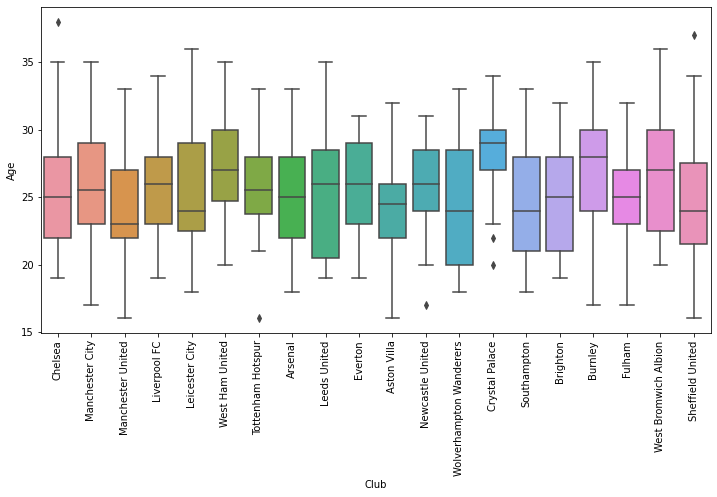

In [23]:
#Average Age of players in each club
plt.figure(figsize=(12,6))
sns.boxplot(x='Club', y='Age', data=data)
plt.xticks(rotation = 90)

In [24]:
num_player = data.groupby('Club')
d =(num_player['Age'].sum()) / num_player.size()
d.sort_values(ascending = False)

Club
Crystal Palace             28.333333
West Ham United            27.500000
Burnley                    27.040000
West Bromwich Albion       26.766667
Newcastle United           26.074074
Manchester City            25.708333
Tottenham Hotspur          25.625000
Leicester City             25.592593
Chelsea                    25.592593
Liverpool FC               25.571429
Everton                    25.413793
Leeds United               25.347826
Fulham                     25.035714
Arsenal                    24.965517
Sheffield United           24.814815
Brighton                   24.555556
Wolverhampton Wanderers    24.444444
Aston Villa                24.291667
Southampton                24.137931
Manchester United          23.862069
dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

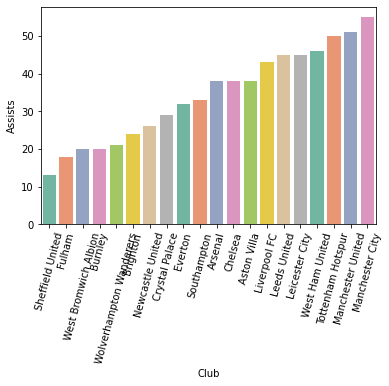

In [25]:
#Total assists from each club
assists_by_club = pd.DataFrame(data.groupby('Club', as_index=False)['Assists'].sum())
ax = sns.barplot(x='Club', y='Assists',data=assists_by_club.sort_values(by='Assists'),palette='Set2')
plt.xticks(rotation = 75)

In [26]:
#Top 10 Assits
top_10_assits = data[['Name', 'Club', 'Assists', 'Matches']].nlargest(n = 10 , columns ='Assists')
top_10_assits

,Name,Club,Assists,Matches
162,Harry Kane,Tottenham Hotspur,14,35
34,Kevin De Bruyne,Manchester City,12,25
51,Bruno Fernandes,Manchester United,12,37
161,Son Heung-min,Tottenham Hotspur,10,37
273,Jack Grealish,Aston Villa,10,26
54,Marcus Rashford,Manchester United,9,37
110,Jamie Vardy,Leicester City,9,34
220,Raphael Dias Belloli,Leeds United,9,30
2,Timo Werner,Chelsea,8,35
136,Aaron Cresswell,West Ham United,8,36


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

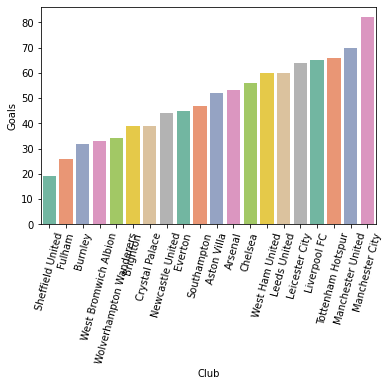

In [27]:
#Goals from each club
Goals_by_club = pd.DataFrame(data.groupby('Club', as_index=False)['Goals'].sum())
ax = sns.barplot(x='Club', y='Goals',data=Goals_by_club.sort_values(by='Goals'),palette='Set2')
plt.xticks(rotation = 75)

In [28]:
#Top 10 Goals
top_10_goals = data[['Name', 'Club', 'Goals', 'Matches']].nlargest(n = 10 , columns ='Goals')
top_10_goals

,Name,Club,Goals,Matches
162,Harry Kane,Tottenham Hotspur,23,35
81,Mohamed Salah,Liverpool FC,22,37
51,Bruno Fernandes,Manchester United,18,37
161,Son Heung-min,Tottenham Hotspur,17,37
214,Patrick Bamford,Leeds United,17,38
237,Dominic Calvert-Lewin,Everton,16,33
110,Jamie Vardy,Leicester City,15,34
267,Ollie Watkins,Aston Villa,14,37
33,?lkay Gündo?an,Manchester City,13,28
191,Alexandre Lacazette,Arsenal,13,31


In [29]:
#Top 10 Goals per Matche
top_10_goals = data[['Name', 'Club', 'GoalsPerMatches', 'Goals', 'Matches']].nlargest(n = 10 , columns ='GoalsPerMatches')
top_10_goals

,Name,Club,GoalsPerMatches,Goals,Matches
162,Harry Kane,Tottenham Hotspur,0.657143,23,35
81,Mohamed Salah,Liverpool FC,0.594595,22,37
307,Joe Willock,Newcastle United,0.571429,8,14
145,Jesse Lingard,West Ham United,0.562500,9,16
175,Gareth Bale,Tottenham Hotspur,0.550000,11,20
74,Anthony Elanga,Manchester United,0.500000,1,2
51,Bruno Fernandes,Manchester United,0.486486,18,37
237,Dominic Calvert-Lewin,Everton,0.484848,16,33
120,Kelechi Iheanacho,Leicester City,0.480000,12,25
92,Diogo Jota,Liverpool FC,0.473684,9,19


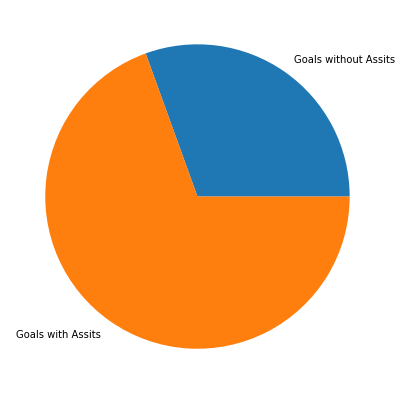

In [30]:
# Goals with asssists and without assists
plt.figure(figsize = (14,7))
Assists  = data['Assists'].sum()
datax = [total_goals - Assists , Assists]
labels = ["Goals without Assits" , "Goals with Assits"]
plt.pie(datax, labels= labels)
plt.show()

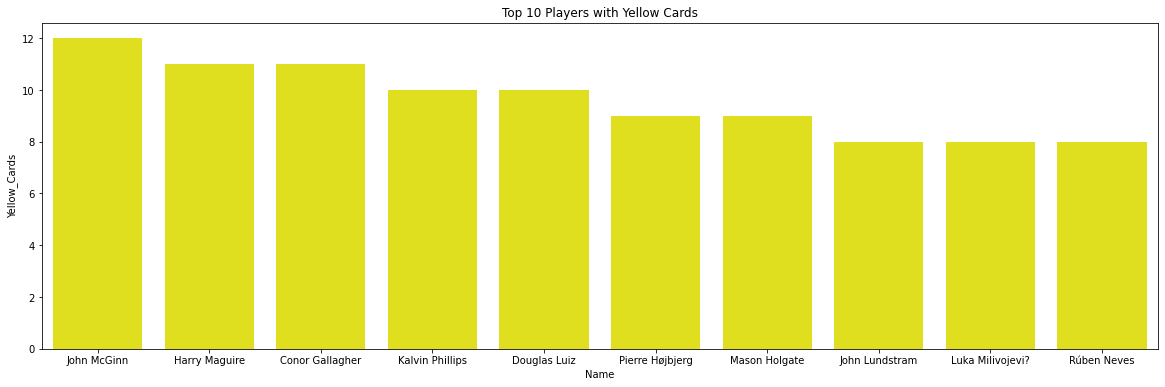

In [36]:
# Top 10 Players with Yellow Cards
top_10_yellow = data.sort_values(by='Yellow_Cards', ascending=False)[:10]
plt.figure(figsize = (20,6))
plt.title('Top 10 Players with Yellow Cards')
c= sns.barplot(x=top_10_yellow['Name'], y= top_10_yellow['Yellow_Cards'], label = 'Players', color='yellow')